### Linear Regression on BAP data

In [1]:
cd ..

/Users/Suriyadeepan/talks/in.pycon.2019


In [2]:
%load_ext autoreload
%autoreload 2

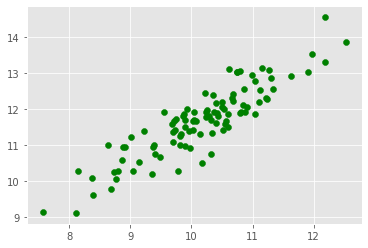

In [8]:
import getorix.data as getdata
import getorix.visualize as getviz

data = getdata.bap_lr()
x, y = data.unbind()
getviz.scatter(x, y, c='green')

## Bayesian Linear Regression

$$\alpha \sim \mathcal{N}(\mu_{\alpha}, \sigma_{\alpha})$$
$$\beta \sim \mathcal{N}(\mu_{\beta}, \sigma_{\beta})$$
$$\epsilon \sim HalfCauchy(\sigma_{\epsilon})$$
$$\mu = \alpha + \beta X $$
$$\hat{y} \sim \mathcal{N}(\mu, \epsilon)$$

In [14]:
import pyro
import pyro.distributions as pdist
import getorix.visualize as getviz
import getorix.inference as getinf
import torch
from torch.distributions import constraints

def bap_lr_model(data):
    x, y = torch.unbind(data)

    alpha = pyro.sample('alpha', pdist.Normal(0., 1.))
    beta = pyro.sample('beta', pdist.Normal(1., 1.))
    epsilon = pyro.sample('epsilon', pdist.HalfCauchy(10.))

    mu = (alpha + beta * x)
    
    with pyro.plate('observe_data'):
        pyro.sample('obs', pdist.Normal(mu, epsilon), obs=y)
    
def bap_lr_guide(data):
    x, y = data
    loc_alpha = pyro.param('loc_alpha', torch.tensor(0.))
    scale_alpha = pyro.param('scale_alpha', torch.tensor(1.), constraint=constraints.positive)
    loc_beta = pyro.param('loc_beta', torch.tensor(1.))
    scale_beta = pyro.param('scale_beta', torch.tensor(10.), constraint=constraints.positive)
    scale_epsilon = pyro.param('scale_epsilon', torch.tensor(1.), constraint=constraints.positive)
    alpha = pyro.sample('alpha', pdist.Normal(loc_alpha, scale_alpha))
    beta = pyro.sample('beta', pdist.Normal(loc_beta, scale_beta))
    epsilon = pyro.sample('epsilon', pdist.HalfCauchy(scale_epsilon))
    mu = (alpha + beta * x)

In [15]:
pyro.clear_param_store()
losses, params = getinf.variational_fit(bap_lr_model, bap_lr_guide,
                                        data, num_epochs=8000, lr=0.01)

100%|██████████| 8000/8000 [00:35<00:00, 227.06it/s]


In [22]:
iris_data, iris_test = getdata.iris()

<h2><font color='teal'>Polynomial Regression</font></h3>

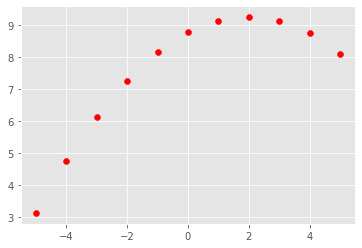

In [27]:
poly_data = getdata.anscombe()
x, y = torch.unbind(poly_data)
getviz.scatter(x, y, c='red')

## Mauna Loa

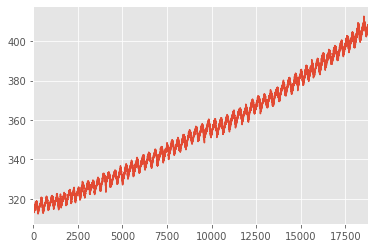

In [29]:
import pandas as pd
df = pd.read_csv('data/mauna-loa-co2-ppm-daily.csv')
df.value.plot()

## 2 Clusters

In [38]:
import getorix.data as getdata
import matplotlib.pyplot as plt
plt.style.use('ggplot')

data = getdata.two_clusters()

(array([ 2., 11., 13.,  4.,  1.,  5., 11., 20., 27.,  6.]),
 array([-0.30675387,  1.2627277 ,  2.8322093 ,  4.401691  ,  5.971173  ,
         7.540654  ,  9.110136  , 10.679618  , 12.249099  , 13.818581  ,
        15.3880625 ], dtype=float32),
 <a list of 10 Patch objects>)

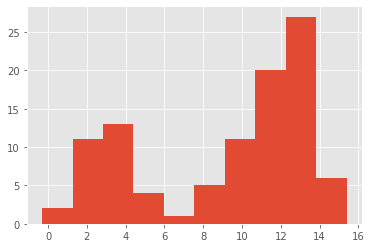

In [39]:
plt.hist(data.detach())

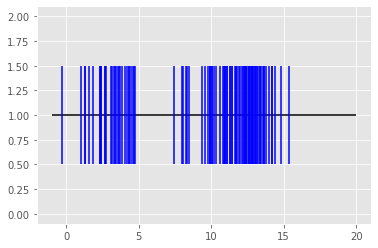

In [45]:
plt.figure()
a = data.detach()
plt.hlines(1, -1, 20)  # Draw a horizontal line
plt.eventplot(a, orientation='horizontal', colors='b')
plt.show()

- Learn to simulate these points